In [36]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2
% matplotlib inline

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 45kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=2b4922a8504069ef68397fb9393eb691d05884a5a93ad3ff97d3296648bec779
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [39]:
%cd My Drive/Face Data

/content/drive/My Drive/Face Data


In [40]:
image=cv2.imread('prady.jpg') # I have loaded my photo
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # Changed the color channel from bgr to rgb

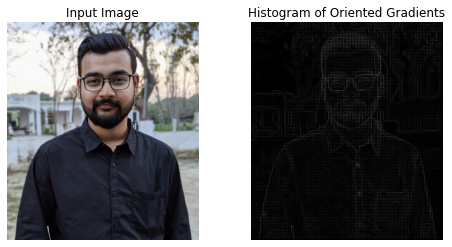

In [41]:
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [44]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np

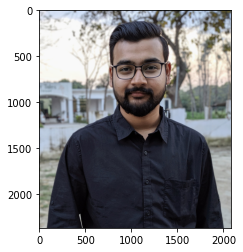

In [45]:
plt.imshow(image)

In [46]:
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print(f'Found {number_of_faces} in input image')

Found 1 in input image


A face is located at pixel location Top: 788, Left: 480, Bottom: 1342, Right: 1035


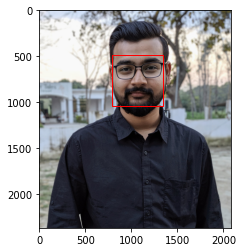

In [48]:
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print('A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}'.format(x,y,w,h))
  rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
plt.show()


# Face detection ends here

In [50]:
# Face recognition is implemented in cells below


pradyumn=cv2.imread('prady.jpg') # Loading my photo
pradyumn=cv2.cvtColor(pradyumn,cv2.COLOR_BGR2RGB)

clooney=cv2.imread('Clooney.jpg') # loading george clooney's photo
clooney=cv2.cvtColor(clooney,cv2.COLOR_BGR2RGB)

leonardo=cv2.imread('leonardo.jpg') # loading leonardo dicaprio's photo
leonardo=cv2.cvtColor(leonardo,cv2.COLOR_BGR2RGB)

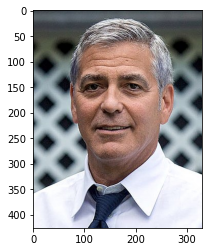

In [53]:
plt.imshow(clooney)

In [54]:
# Making dataset that contains encoding for all known images

prady_encoding=face_recognition.face_encodings(pradyumn)[0]
clooney_encoding=face_recognition.face_encodings(clooney)[0]
leonardo_encoding=face_recognition.face_encodings(leonardo)[0]

known_face_encodings=[
                      prady_encoding,
                      clooney_encoding,
                      leonardo_encoding,
]

In [56]:
# Testing the model using and unknown image of George Clooney
clooney_test=cv2.imread('clooney_unknown.jpg')
clooney_test=cv2.cvtColor(clooney_test,cv2.COLOR_BGR2RGB)
# plt.imshow(clooney_test)
unknown_encodings=face_recognition.face_encodings(clooney_test)

In [58]:
from scipy.spatial import distance
for unknown_encoding in unknown_encodings:
  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_encoding)
    results.append(d)
  threshold=0.6
  results=np.array(results)<=threshold
  name='unknown'
  if results[0]:
    name='Pradyumn'
  elif results[1]:
    name='George Clooney'
  elif results[2]:
    name='Leonardo DiCaprio'
  print(f' Found {name} in the photo! ')


 Found George Clooney in the photo! 


In [59]:
# Testing the model using unknown image of Leonardo DiCaprio

leo_test=cv2.imread('leo_unknown.jpg')
leo_test=cv2.cvtColor(leo_test,cv2.COLOR_BGR2RGB)
unknown_encodings=face_recognition.face_encodings(leo_test)
from scipy.spatial import distance
for unknown_encoding in unknown_encodings:
  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_encoding)
    results.append(d)
  threshold=0.6
  results=np.array(results)<=threshold
  name='unknown'
  if results[0]:
    name='Pradyumn'
  elif results[1]:
    name='George Clooney'
  elif results[2]:
    name='Leonardo DiCaprio'
  print(f' Found {name} in the photo! ')
# We can use the puttext function from opencv to show the detected name on the photo

 Found Leonardo DiCaprio in the photo! 
